In [ ]:
import pandas as pd
df = pd.read_csv('/content/casos_covid19_2020.csv')
print(df.head())


   numero_de_caso fecha_apertura_snvs fecha_toma_muestra fecha_clasificacion  \
0         4742251           26NOV2020          22DEC2020           04MAR2021   
1         2025629           21AUG2020          21AUG2020           26JAN2021   
2         4964824           03DEC2020          03DEC2020           16DEC2020   
3         4986600           04DEC2020          03DEC2020           12APR2021   
4         4987906           04DEC2020          17DEC2020           09MAY2021   

      provincia     barrio  comuna     genero  edad clasificacion  \
0  Buenos Aires        NaN     NaN  masculino  29.0    confirmado   
1  Buenos Aires        NaN     NaN   femenino  56.0    confirmado   
2          CABA    ALMAGRO     5.0  masculino  50.0    confirmado   
3          CABA  MATADEROS     9.0   femenino  42.0    confirmado   
4          CABA   BELGRANO    13.0  masculino  37.0    confirmado   

  fecha_fallecimiento fallecido fecha_alta           tipo_contagio  
0                 NaN       NaN    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84991 entries, 0 to 84990
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   numero_de_caso       84991 non-null  int64  
 1   fecha_apertura_snvs  84991 non-null  object 
 2   fecha_toma_muestra   84852 non-null  object 
 3   fecha_clasificacion  84991 non-null  object 
 4   provincia            84657 non-null  object 
 5   barrio               51771 non-null  object 
 6   comuna               51771 non-null  float64
 7   genero               84988 non-null  object 
 8   edad                 84974 non-null  float64
 9   clasificacion        84990 non-null  object 
 10  fecha_fallecimiento  2766 non-null   object 
 11  fallecido            2766 non-null   object 
 12  fecha_alta           41914 non-null  object 
 13  tipo_contagio        84298 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 9.1+ MB


In [ ]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

numero_de_caso             0
fecha_apertura_snvs        0
fecha_toma_muestra       139
fecha_clasificacion        0
provincia                334
barrio                 33220
comuna                 33220
genero                     3
edad                      17
clasificacion              1
fecha_fallecimiento    82225
fallecido              82225
fecha_alta             43077
tipo_contagio            693
dtype: int64


In [ ]:
columna, filas = df.shape
print(f"El dataframe tiene {filas} filas y {columna} columnas.")

El dataframe tiene 14 filas y 84991 columnas.


In [ ]:
df.head(5)

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,4742251,26NOV2020,22DEC2020,04MAR2021,Buenos Aires,NaN,NaN,masculino,29.0,confirmado,NaN,NaN,NaN,Comunitario
1,2025629,21AUG2020,21AUG2020,26JAN2021,Buenos Aires,NaN,NaN,femenino,56.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud
2,4964824,03DEC2020,03DEC2020,16DEC2020,CABA,ALMAGRO,5.0,masculino,50.0,confirmado,NaN,NaN,NaN,Comunitario
3,4986600,04DEC2020,03DEC2020,12APR2021,CABA,MATADEROS,9.0,femenino,42.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud
4,4987906,04DEC2020,17DEC2020,09MAY2021,CABA,BELGRANO,13.0,masculino,37.0,confirmado,NaN,NaN,NaN,Contacto


In [ ]:
# Lista de las columnas que contienen fechas
columnas_con_fechas = ['fecha_apertura_snvs', 'fecha_toma_muestra', 'fecha_clasificacion']

# Convertir cada columna a formato de fecha
for fecha in columnas_con_fechas:
    df[fecha] = pd.to_datetime(df[fecha], format='%d%b%Y')


In [ ]:
df.head(5)

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,4742251,2020-11-26,2020-12-22,2021-03-04,Buenos Aires,NaN,NaN,masculino,29.0,confirmado,NaN,NaN,NaN,Comunitario
1,2025629,2020-08-21,2020-08-21,2021-01-26,Buenos Aires,NaN,NaN,femenino,56.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud
2,4964824,2020-12-03,2020-12-03,2020-12-16,CABA,ALMAGRO,5.0,masculino,50.0,confirmado,NaN,NaN,NaN,Comunitario
3,4986600,2020-12-04,2020-12-03,2021-04-12,CABA,MATADEROS,9.0,femenino,42.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud
4,4987906,2020-12-04,2020-12-17,2021-05-09,CABA,BELGRANO,13.0,masculino,37.0,confirmado,NaN,NaN,NaN,Contacto


In [ ]:
for fecha in columnas_con_fechas:
    df[fecha] = df[fecha].dt.strftime('%d/%m/%Y')

In [ ]:
df.head(5)

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,4742251,26/11/2020,22/12/2020,04/03/2021,Buenos Aires,NaN,NaN,masculino,29.0,confirmado,NaN,NaN,NaN,Comunitario
1,2025629,21/08/2020,21/08/2020,26/01/2021,Buenos Aires,NaN,NaN,femenino,56.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud
2,4964824,03/12/2020,03/12/2020,16/12/2020,CABA,ALMAGRO,5.0,masculino,50.0,confirmado,NaN,NaN,NaN,Comunitario
3,4986600,04/12/2020,03/12/2020,12/04/2021,CABA,MATADEROS,9.0,femenino,42.0,confirmado,NaN,NaN,NaN,Trabajador de la Salud
4,4987906,04/12/2020,17/12/2020,09/05/2021,CABA,BELGRANO,13.0,masculino,37.0,confirmado,NaN,NaN,NaN,Contacto


In [ ]:
valores_fallecidos = df['fallecido'].value_counts()
print(valores_fallecidos)


fallecido
si    2766
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Crear DataFrame de ejemplo
df['fallecido_binario'] = df['fallecido'].notna().astype(int)
print(df)


       numero_de_caso fecha_apertura_snvs fecha_toma_muestra  \
0             4742251          26/11/2020         22/12/2020   
1             2025629          21/08/2020         21/08/2020   
2             4964824          03/12/2020         03/12/2020   
3             4986600          04/12/2020         03/12/2020   
4             4987906          04/12/2020         17/12/2020   
...               ...                 ...                ...   
84986         1566880          28/07/2020         28/07/2020   
84987         1566906          28/07/2020         28/07/2020   
84988         1566982          28/07/2020         28/07/2020   
84989         1566994          28/07/2020         28/07/2020   
84990         1567016          28/07/2020         28/07/2020   

      fecha_clasificacion     provincia         barrio  comuna     genero  \
0              04/03/2021  Buenos Aires            NaN     NaN  masculino   
1              26/01/2021  Buenos Aires            NaN     NaN   femenino   


In [ ]:
df = df.drop(columns=['fecha_fallecimiento', 'fecha_alta', 'fallecido'])


In [ ]:
 df = df.dropna(subset=['edad'])
 df['edad'] = df['edad'].astype(int)
df = df.fillna({'comuna': 16, 'barrio': 'PROVINCIA'})
df = df.dropna(subset=['comuna'])
 df['comuna'] = df['comuna'].astype(int)


<ipython-input-16-2affa104e4f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['edad'] = df['edad'].astype(int)


In [ ]:
df.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,tipo_contagio,fallecido_binario
0,4742251,26/11/2020,22/12/2020,04/03/2021,Buenos Aires,PROVINCIA,16,masculino,29,confirmado,Comunitario,0
1,2025629,21/08/2020,21/08/2020,26/01/2021,Buenos Aires,PROVINCIA,16,femenino,56,confirmado,Trabajador de la Salud,0
2,4964824,03/12/2020,03/12/2020,16/12/2020,CABA,ALMAGRO,5,masculino,50,confirmado,Comunitario,0
3,4986600,04/12/2020,03/12/2020,12/04/2021,CABA,MATADEROS,9,femenino,42,confirmado,Trabajador de la Salud,0
4,4987906,04/12/2020,17/12/2020,09/05/2021,CABA,BELGRANO,13,masculino,37,confirmado,Contacto,0


In [ ]:
media = df['edad'].mean()

print(f"La media de la columna es: {media}")

La media de la columna es: 42.395026714053714


In [ ]:
Q1 = df['edad'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['edad'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

edad_sin_outliers = df[(df['edad'] >= limite_inferior) & (df['edad'] <= limite_superior)]


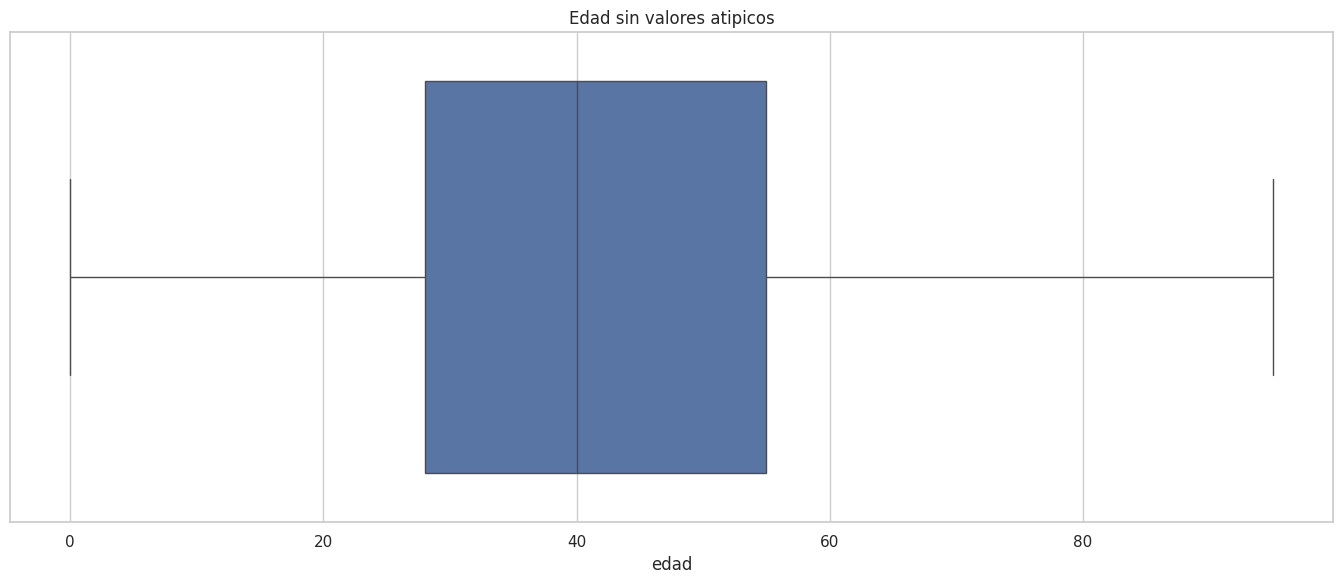

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Comparar con gráficos de bigotes
plt.figure(figsize=(27, 6))

plt.subplot(1, 2, 2)
sns.boxplot(data=edad_sin_outliers, x='edad')
plt.title("Edad sin valores atipicos")

plt.tight_layout()
plt.show()

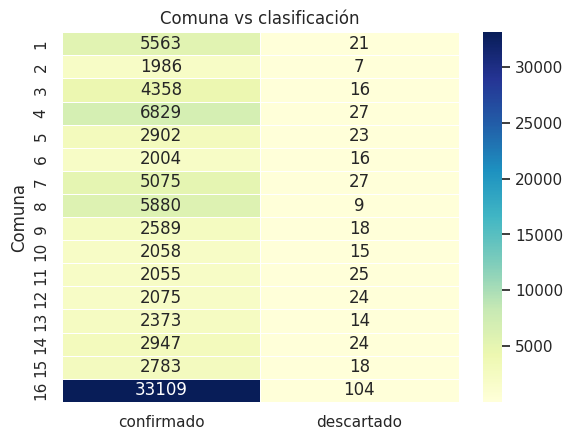

In [ ]:
# Crear tabla cruzada
tabla = pd.crosstab(df['comuna'], df['clasificacion'])

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor
sns.heatmap(tabla, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

plt.title('Comuna vs clasificación')
plt.xlabel('')
plt.ylabel('Comuna')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada comuna
frecuencias = df['comuna'].value_counts()

# Crear un gráfico de barras
plt.bar(frecuencias.index, frecuencias.values, color='lightblue', edgecolor='black')

# Añadir título y etiquetas
plt.title("Frecuencia de Comunas")
plt.xlabel("Comuna")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.show()


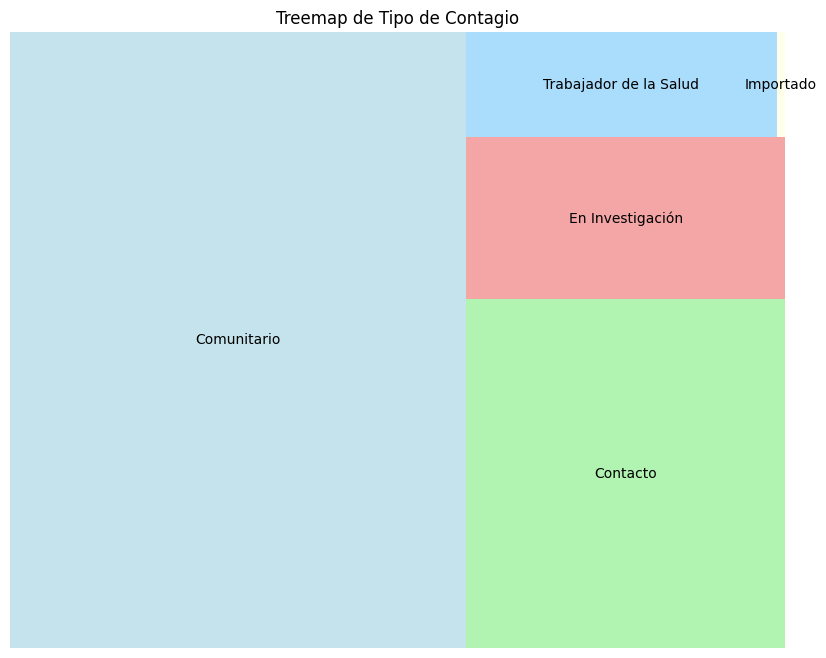

In [ ]:
# libraries
import matplotlib.pyplot as plt
!pip install squarify
import pandas as pd
import squarify

# Supongamos que tienes un DataFrame llamado df y una columna llamada 'tipo_contagio'
# Contamos la frecuencia de cada valor en la columna 'tipo_contagio'
frecuencias = df['tipo_contagio'].value_counts()

# Crear el gráfico de treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=frecuencias.values, label=frecuencias.index, color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow'], alpha=0.7)

# Añadir título y mostrar gráfico
plt.title('Treemap de Tipo de Contagio')
plt.axis('off')  # Desactivar los ejes
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por Género y Falleció, y contar las ocurrencias
resultado = df.groupby(['genero', 'fallecido_binario']).size().reset_index(name='Cantidad')

print(resultado)


      genero  fallecido_binario  Cantidad
0   femenino                  0     39285
1   femenino                  1      1268
2  masculino                  0     42921
3  masculino                  1      1492
4       otro                  0         8


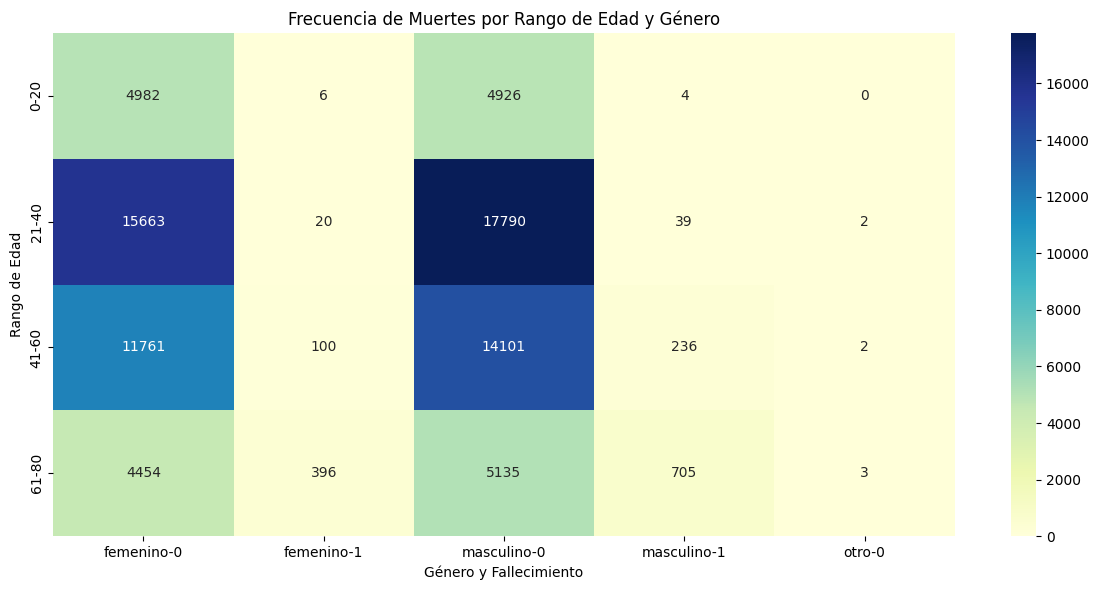

In [ ]:
# Crear rangos de edad
df['Rango_Edad'] = pd.cut(df['edad'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])

# Crear tabla de frecuencias
heatmap_data = pd.crosstab(index=df['Rango_Edad'], columns=[df['genero'], df['fallecido_binario']])

# Crear heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

# Configurar etiquetas y título
plt.title("Frecuencia de Muertes por Rango de Edad y Género")
plt.ylabel("Rango de Edad")
plt.xlabel("Género y Fallecimiento")
plt.tight_layout()
plt.show()
